<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [2]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [3]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

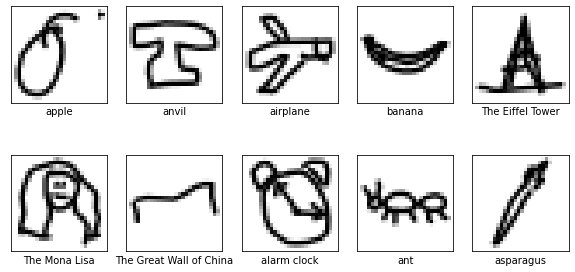

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [5]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 784), (80000,), (20000, 784), (20000,))

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(784, input_dim=784, activation='sigmoid'))
model.add(Dense(784, activation='selu'))
model.add(Dense(784, activation='selu'))
model.add(Dense(64, activation='selu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 112s 45ms/step - loss: 0.8488 - accuracy: 0.7345 - val_loss: 0.7261 - val_accuracy: 0.7777
Epoch 2/5
2500/2500 [==============================] - 106s 43ms/step - loss: 0.6838 - accuracy: 0.7898 - val_loss: 0.6814 - val_accuracy: 0.7863
Epoch 3/5
2500/2500 [==============================] - 191s 77ms/step - loss: 0.6396 - accuracy: 0.8013 - val_loss: 0.6571 - val_accuracy: 0.7944
Epoch 4/5
2500/2500 [==============================] - 145s 58ms/step - loss: 0.6082 - accuracy: 0.8110 - val_loss: 0.6428 - val_accuracy: 0.7973
Epoch 5/5
2500/2500 [==============================] - 106s 43ms/step - loss: 0.5925 - accuracy: 0.8165 - val_loss: 0.6102 - val_accuracy: 0.8106


In [57]:
from tensorflow.keras.optimizers import SGD

def create_model(lr=.001):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [58]:
batch64 = create_model()
results = batch64.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_test, y_test))

Epoch 1/25
1250/1250 [==============================] - 13s 10ms/step - loss: 2.2164 - accuracy: 0.3765 - val_loss: 1.4215 - val_accuracy: 0.4972
Epoch 2/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3579 - accuracy: 0.5278 - val_loss: 1.2756 - val_accuracy: 0.5560
Epoch 3/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2414 - accuracy: 0.5685 - val_loss: 1.2038 - val_accuracy: 0.5775
Epoch 4/25
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1660 - accuracy: 0.5974 - val_loss: 1.1232 - val_accuracy: 0.6058
Epoch 5/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1064 - accuracy: 0.6194 - val_loss: 1.0777 - val_accuracy: 0.6339
Epoch 6/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0561 - accuracy: 0.6447 - val_loss: 1.0507 - val_accuracy: 0.6428
Epoch 7/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0132 - accuracy: 0.6657 - val_loss: 1.0015 - val_accurac

In [37]:
# # flatten layer model in tensorflow
# X_train = X_train.reshape((X_train.shape[0], 784))
# # numpy zip from bottom append all 28 segments into 784 flat vector
# X_test = X_test.reshape((X_test.shape[0], 784))

# print(X_train.shape)
# print(X_test.shape)

In [12]:
# from tensorflow.keras import Sequential # one layer at a time
# # https://keras.io/getting-started/sequential-model-guide/
# model = Sequential()

In [14]:
# model.add(
#     # hidden layer
#     Dense(units=32, activation='relu', input_dim=784) 
#     #actv=input values
# )

In [15]:
# model.add(
#     Dense(units=10, activation='softmax', ) 
#     #softmax multiclass version of sigmoid 
#     # input dim is inferred from prior layer
# )

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 1,897,210
Trainable params: 1,897,210
Non-trainable params: 0
_________________________________________________________________


# compile the model 

In [18]:
# # how am i going to update those weights based on that loss function
# # that's where optimization algorithms come in
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# # SCCE allows you to use a target that is a number, keras automatically do some transformations; categorical_crossentropy expects target is one hot encoded
# # optimizer and loss function are required params;
#     # overall performance, add metrics = accuracy
# # optimizer is alg that controls updating of the weights based on information from loss function - optimizer is the thing that updates the weights based on loss function


# fit model 

In [16]:
results = model.fit(
    X_train, 
    y_train,
    epochs=5, # number of complete iterations over layers/architecture
    validation_data=(X_test, y_test))


Epoch 1/5
2500/2500 [==============================] - 102s 41ms/step - loss: 0.5789 - accuracy: 0.8180 - val_loss: 0.6280 - val_accuracy: 0.8033
Epoch 2/5
2500/2500 [==============================] - 114s 46ms/step - loss: 0.5684 - accuracy: 0.8238 - val_loss: 0.6020 - val_accuracy: 0.8153
Epoch 3/5
2500/2500 [==============================] - 126s 50ms/step - loss: 0.5542 - accuracy: 0.8278 - val_loss: 0.5773 - val_accuracy: 0.8235
Epoch 4/5
2500/2500 [==============================] - 107s 43ms/step - loss: 0.5466 - accuracy: 0.8289 - val_loss: 0.5672 - val_accuracy: 0.8216
Epoch 5/5
2500/2500 [==============================] - 103s 41ms/step - loss: 0.5399 - accuracy: 0.8310 - val_loss: 0.5695 - val_accuracy: 0.8253


In [20]:
# Q: other classes of optimization besides stochastic gradient descent
# A: all of the flavors available in tensorflow are variations of SGD - adam nadam adadelta adagrad rmsprop sgd

In [21]:
# batch is important concept in PERFORMANCE AND OPTIMIZATION


# evaluate model

In [13]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 10s 16ms/step - loss: 0.6102 - accuracy: 0.8106


[0.6101846098899841, 0.8105999827384949]

In [40]:
# early stopping

In [41]:
# can't start from scratch/rerun model - rename or redefine+compile

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

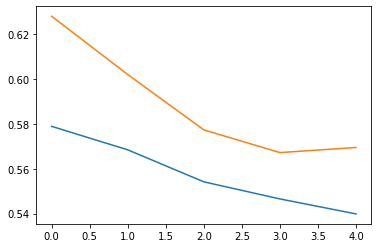

In [17]:
import seaborn as sns
epochs = [i for i in range(len(results.history['loss']))]
sns.lineplot(epochs, results.history['loss'])
sns.lineplot(epochs, results.history['val_loss']);

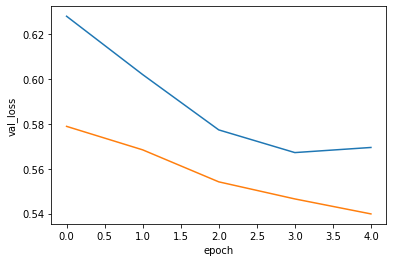

In [20]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(results.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [22]:
from tensorflow.keras.optimizers import Adam

adam = Adam()

def create_model(lr=.001):
  opt = Adam(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [26]:
adam_comparison = create_model()
adam_results = adam_comparison.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test))

Epoch 1/5
1250/1250 [==============================] - 12s 10ms/step - loss: 2.5538 - accuracy: 0.4667 - val_loss: 1.3356 - val_accuracy: 0.5418
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2058 - accuracy: 0.5936 - val_loss: 1.1842 - val_accuracy: 0.6008
Epoch 3/5
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0943 - accuracy: 0.6400 - val_loss: 1.0753 - val_accuracy: 0.6640
Epoch 4/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0316 - accuracy: 0.6641 - val_loss: 1.0453 - val_accuracy: 0.6594
Epoch 5/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9985 - accuracy: 0.6748 - val_loss: 1.0117 - val_accuracy: 0.6685


In [27]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 16s 25ms/step - loss: 0.5695 - accuracy: 0.8253


[0.5695062279701233, 0.8253499865531921]

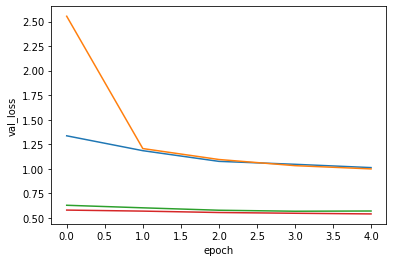

In [31]:

adam_df = pd.DataFrame.from_records(adam_results.history)
adam_df['epoch'] = [i for i in range(adam_df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=adam_df, markers=True)
ax = sns.lineplot(x='epoch', y='loss', data=adam_df, markers=True)
ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)

In [ ]:
# problem will a student pass the exam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=2, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y, epochs=5)